In [1]:
import json
import pandas as pd
import requests
from urllib.request import urlopen
import matplotlib.pyplot as plt

In [2]:
# --- US company list

response = requests.get('https://financialmodelingprep.com/api/v3/stock/list?apikey=f33b3631d5140a4f1c87e7f2eafd8fdd')
response.encoding = 'utf-8'
raw_list=response.json()
comp_list = [i['symbol'] for i in raw_list]
exchange = set([i['exchange'] for i in raw_list])
exchange_us = ['NASDAQ',
 'NASDAQ Global Market',
 'NYSE',
 'NYSE American',
 'Nasdaq',
 'Nasdaq Capital Market',
 'Nasdaq Global Market',
 'Nasdaq Global Select',
 'New York Stock Exchange',
 'New York Stock Exchange Arca']
us_list = [i['symbol'] for i in raw_list if i['exchange'] in exchange_us]

In [5]:
def ratio():
    ratio_info = []
    n = 0
    for i in us_list:
        url_comp = urlopen(f'https://financialmodelingprep.com/api/v3/ratios/{i}?period=quarter&limit=140&apikey=f33b3631d5140a4f1c87e7f2eafd8fdd')
        data=json.loads(url_comp.read().decode('utf-8'))
        ratio_info.append(data)
        n += 1
        print(f'Downloaded ratio of {i}. Process: {round((n/10422)*100,2)}%.')
    with open('ratios.txt', 'w') as outfile:
        json.dump(ratio_info, outfile)
    print('Complete!')

In [6]:
tw = pd.read_csv('data/tw_clean.csv')
tw.iloc[0]

Bankrupt?                                  1.000000e+00
 ROA(A) before interest and % after tax    4.243894e-01
 Net Value Per Share (A)                   1.479499e-01
 Revenue Per Share                         1.755978e-02
 Net Value Growth Rate                     3.269770e-04
 Current Ratio                             2.258963e-03
 Quick Ratio                               1.207755e-03
 Total debt/Total net worth                2.126592e-02
 Long-term fund suitability ratio (A)      5.024455e-03
 Contingent liabilities/Net worth          6.478502e-03
 Operating profit/Paid-in capital          9.588483e-02
 Net profit before tax/Paid-in capital     1.377573e-01
 Total Asset Turnover                      8.695652e-02
 Accounts Receivable Turnover              1.813884e-03
 Average Collection Days                   3.487364e-03
 Fixed Assets Turnover Frequency           1.165010e-04
 Net Worth Turnover Rate (times)           3.290323e-02
 Revenue per person                        3.416

In [22]:
for i in ['asset_df.csv', 'income_df.csv', 'growth_df.csv', 'ratio_df.csv', 'cashflow_df.csv']:
    temp = pd.read_csv(f'data\{i}')
    temp.iloc[0].to_csv(f'data\{i[0:-4]}_title.csv')

In [21]:
profile = pd.read_json('data/profile.txt')
profile[0][0]

{'symbol': 'SPY',
 'price': 433.72,
 'beta': 1.0,
 'volAvg': 66845193,
 'mktCap': 398060421120,
 'lastDiv': 5.573,
 'range': '310.68-434.1',
 'changes': 3.29,
 'companyName': 'SPDR S&P 500 ETF Trust',
 'currency': 'USD',
 'cik': '0000884394',
 'isin': 'US78462F1030',
 'cusip': '78462F103',
 'exchange': 'New York Stock Exchange Arca',
 'exchangeShortName': 'NYSE',
 'industry': '',
 'website': '',
 'description': 'The investment seeks to provide investment results that, before expenses, correspond generally to the price and yield performance of the S&P 500® Index.\n The Trust seeks to achieve its investment objective by holding a portfolio of the common stocks that are included in the index (the “Portfolio”), with the weight of each stock in the Portfolio substantially corresponding to the weight of such stock in the index.',
 'ceo': 'None',
 'sector': '',
 'country': 'US',
 'fullTimeEmployees': '',
 'phone': '866-732-8673',
 'address': None,
 'city': None,
 'state': None,
 'zip': None,


In [3]:
with open('data/profile.txt', 'rb') as f:
    temp = f.read()
    print(temp)
    f.close()

b''


In [8]:
company_name = 'AAPL'
url_comp = urlopen(
    f'https://financialmodelingprep.com/api/v3/profile/{company_name}?apikey=f33b3631d5140a4f1c87e7f2eafd8fdd')
data = json.loads(url_comp.read().decode('utf-8'))
df = pd.DataFrame.from_dict(data)
df.drop(column='description').T
df['description']

,0
symbol,AAPL
price,148.56
beta,1.20815
volAvg,84373304
mktCap,2479109701632
lastDiv,0.835
range,93.2475-150.0
changes,1.76
companyName,Apple Inc.
currency,USD


In [2]:
asset = pd.read_csv('data/asset_df.csv')
asset.head()

,Unnamed: 0,date,symbol,reportedCurrency,fillingDate,acceptedDate,period,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,...,othertotalStockholdersEquity,totalStockholdersEquity,totalLiabilitiesAndStockholdersEquity,totalInvestments,totalDebt,netDebt,link,finalLink,quarter,year
0,0,2021-03-31,CMCSA,USD,2021-04-29,2021-04-29 15:22:23,Q1,1.495000e+10,0.0,1.495000e+10,...,0.0,9.257500e+10,2.769860e+11,0.0,1.037130e+11,8.876300e+10,https://www.sec.gov/Archives/edgar/data/116669...,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,81,2021
1,1,2020-12-31,CMCSA,USD,2021-02-04,2021-02-03 18:08:14,Q4,1.174000e+10,0.0,1.174000e+10,...,0.0,9.173800e+10,2.738690e+11,0.0,1.037600e+11,9.202000e+10,https://www.sec.gov/Archives/edgar/data/116669...,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,80,2020
2,2,2020-09-30,CMCSA,USD,2020-10-29,2020-10-29 15:03:25,Q1,1.370700e+10,0.0,1.370700e+10,...,0.0,8.757100e+10,2.689400e+11,0.0,1.044240e+11,9.071700e+10,https://www.sec.gov/Archives/edgar/data/116669...,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,77,2020
3,3,2020-06-30,CMCSA,USD,2020-07-30 00:00:00,2020-07-30 18:31:48,Q2,1.393500e+10,0.0,1.393500e+10,...,0.0,8.479100e+10,2.659780e+11,0.0,1.048100e+11,9.087500e+10,https://www.sec.gov/Archives/edgar/data/116669...,https://www.sec.gov/Archives/edgar/data/116669...,78,2020
4,4,2020-03-31,CMCSA,USD,2020-04-30 00:00:00,2020-04-30 15:24:15,Q1,8.516000e+09,0.0,8.516000e+09,...,0.0,8.278300e+10,2.624210e+11,0.0,1.035770e+11,9.506100e+10,https://www.sec.gov/Archives/edgar/data/116669...,https://www.sec.gov/Archives/edgar/data/116669...,77,2020


In [3]:
asset = asset.loc[asset['symbol'] == 'AAPL']
asset.head()

,Unnamed: 0,date,symbol,reportedCurrency,fillingDate,acceptedDate,period,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,...,othertotalStockholdersEquity,totalStockholdersEquity,totalLiabilitiesAndStockholdersEquity,totalInvestments,totalDebt,netDebt,link,finalLink,quarter,year
630,630,2021-03-27,AAPL,USD,2021-04-29,2021-04-28 18:02:54,Q2,3.846600e+10,3.136800e+10,6.983400e+10,...,0.0,6.917800e+10,3.371580e+11,1.659070e+11,1.216450e+11,8.317900e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,82,2021
631,631,2020-12-26,AAPL,USD,2021-01-28,2021-01-27 18:03:06,Q1,3.601000e+10,4.081600e+10,7.682600e+10,...,0.0,6.622400e+10,3.540540e+11,1.595610e+11,1.120430e+11,7.603300e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,77,2020
632,632,2020-09-26,AAPL,USD,2020-10-30,2020-10-29 18:06:25,Q4,3.801600e+10,5.292700e+10,9.094300e+10,...,0.0,6.533900e+10,3.238880e+11,1.538140e+11,1.124360e+11,7.442000e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,80,2020
633,633,2020-06-27,AAPL,USD,2020-07-31,2020-07-30 19:29:09,Q3,3.338300e+10,5.964200e+10,9.302500e+10,...,0.0,7.228200e+10,3.173440e+11,1.602340e+11,1.068100e+11,7.342700e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,79,2020
634,634,2020-03-28,AAPL,USD,2020-05-01,2020-04-30 18:03:10,Q2,4.017400e+10,5.387700e+10,9.405100e+10,...,0.0,7.842500e+10,3.204000e+11,1.526700e+11,1.095070e+11,6.933300e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,78,2020


In [5]:
asset = asset.loc[asset['year'] == 2020]
asset.head()

,Unnamed: 0,date,symbol,reportedCurrency,fillingDate,acceptedDate,period,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,...,othertotalStockholdersEquity,totalStockholdersEquity,totalLiabilitiesAndStockholdersEquity,totalInvestments,totalDebt,netDebt,link,finalLink,quarter,year
631,631,2020-12-26,AAPL,USD,2021-01-28,2021-01-27 18:03:06,Q1,3.601000e+10,4.081600e+10,7.682600e+10,...,0.0,6.622400e+10,3.540540e+11,1.595610e+11,1.120430e+11,7.603300e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,77,2020
632,632,2020-09-26,AAPL,USD,2020-10-30,2020-10-29 18:06:25,Q4,3.801600e+10,5.292700e+10,9.094300e+10,...,0.0,6.533900e+10,3.238880e+11,1.538140e+11,1.124360e+11,7.442000e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,80,2020
633,633,2020-06-27,AAPL,USD,2020-07-31,2020-07-30 19:29:09,Q3,3.338300e+10,5.964200e+10,9.302500e+10,...,0.0,7.228200e+10,3.173440e+11,1.602340e+11,1.068100e+11,7.342700e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,79,2020
634,634,2020-03-28,AAPL,USD,2020-05-01,2020-04-30 18:03:10,Q2,4.017400e+10,5.387700e+10,9.405100e+10,...,0.0,7.842500e+10,3.204000e+11,1.526700e+11,1.095070e+11,6.933300e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,78,2020


In [7]:
asset = asset.loc[asset['period'] == "Q1"]
asset

,Unnamed: 0,date,symbol,reportedCurrency,fillingDate,acceptedDate,period,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,...,othertotalStockholdersEquity,totalStockholdersEquity,totalLiabilitiesAndStockholdersEquity,totalInvestments,totalDebt,netDebt,link,finalLink,quarter,year
631,631,2020-12-26,AAPL,USD,2021-01-28,2021-01-27 18:03:06,Q1,3.601000e+10,4.081600e+10,7.682600e+10,...,0.0,6.622400e+10,3.540540e+11,1.595610e+11,1.120430e+11,7.603300e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,77,2020


In [3]:
growth = pd.read_csv('data/growth_df.csv')
growth.head()

,Unnamed: 0,symbol,date,period,revenueGrowth,grossProfitGrowth,ebitgrowth,operatingIncomeGrowth,netIncomeGrowth,epsgrowth,...,threeYDividendperShareGrowthPerShare,receivablesGrowth,inventoryGrowth,assetGrowth,bookValueperShareGrowth,debtGrowth,rdexpenseGrowth,sgaexpensesGrowth,quarter,year
0,0,CMCSA,2021-03-31,Q1,-0.018154,0.000876,0.286115,0.286115,-0.015089,-0.010687,...,0.499753,-0.041863,0.0,0.016950,0.006850,-0.000453,0.0,-0.096284,81,2021
1,1,CMCSA,2020-12-31,Q4,0.085226,0.076796,-0.038763,-0.038763,0.674096,0.672761,...,0.477505,0.112124,0.0,0.018328,0.046748,-0.006359,0.0,0.135377,80,2020
2,2,CMCSA,2020-09-30,Q1,0.076618,0.004083,-0.122875,-0.122875,-0.324297,-0.319870,...,0.486179,0.008116,0.0,0.011136,0.039556,-0.003683,0.0,0.056225,79,2020
3,3,CMCSA,2020-06-30,Q2,-0.108760,-0.077016,-0.042251,-0.042251,0.391709,0.394736,...,0.468651,-0.053056,0.0,0.013555,0.026479,0.011904,0.0,-0.074029,78,2020
4,4,CMCSA,2020-03-31,Q1,-0.062997,-0.041366,-0.075281,-0.075281,-0.320999,-0.320265,...,0.556310,-0.043571,0.0,-0.003770,-0.011939,0.013305,0.0,-0.054937,77,2020


In [5]:
ratio = pd.read_csv('data/ratio_df.csv')
ratio.iloc[0]

Unnamed: 0                                     0
symbol                                     CMCSA
date                                  2021-03-31
period                                         1
currentRatio                            0.955438
quickRatio                              0.841777
cashRatio                               0.485216
daysOfSalesOutstanding                   147.395
daysOfInventoryOutstanding                     0
operatingCycle                           36.3441
daysOfPayablesOutstanding                112.492
cashConversionCycle                     -76.1484
grossProfitMargin                       0.672156
operatingProfitMargin                   0.185223
pretaxProfitMargin                      0.162139
netProfitMargin                         0.122367
effectiveTaxRate                        0.253684
returnOnAssets                         0.0119528
returnOnEquity                           0.03596
returnOnCapitalEmployed                0.0203432
netIncomePerEBT     

In [26]:
def get_jsonparsed_data(company,quarter,year):
    response = urlopen(f'https://financialmodelingprep.com/api/v3/earning_call_transcript/{company}?quarter={quarter}&year={year}&apikey=f33b3631d5140a4f1c87e7f2eafd8fdd')
    data = response.read().decode("utf-8")
    return json.loads(data)
AAPL = get_jsonparsed_data('TSLA',1,2020)

In [27]:
AAPL[0]['content']

"Operator: Ladies and gentlemen, thank you for standing by, and welcome to Tesla's Q1 2020 Financial Results and Q&A Webcast. At this time, all participants are in a listen-only mode. After the speaker presentation, there will be a question-and-answer session. [Operator Instructions] Please be advised that today's conference is being recorded. [Operator Instructions]I would now like to hand the conference over to your speaker, Mr. Martin Viecha, Senior Director for Investor Relations. Please go ahead, sir.\nMartin Viecha: Thank you, Sherry, and good afternoon, everyone. Welcome to Tesla's First Quarter 2020 Q&A Webcast. I'm joined today by Elon Musk, Zachary Kirkhorn and a number of other executives. Our Q1 results were announced at about 1:00 p.m. Pacific Time in the update deck we published at the same link as this webcast.During this call, we will discuss our business outlook and make forward-looking statements. These comments are based on our predictions and expectations as of toda

In [19]:
from google.protobuf.symbol_database import Default
import streamlit as st
import pandas as pd
import numpy as np
import json
from urllib.request import urlopen
import pickle
from sklearn.feature_extraction.text import CountVectorizer
import base64
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation

company_name = 'AAPL'
quarter = 1
year = 2020

def word_preprocess(n):
    # --- Remove separaters
    n = re.sub(r'\n', '', n)
    n = re.sub(r'--', '', n)
    # --- Remove stopword
    stop_words = set(stopwords.words('english')+list(punctuation))
    words_token = [w for w in word_tokenize(
        n) if not w.lower() in stop_words]
    filtered_sentence = [i for i in words_token if i not in stop_words]
    # --- Lemmatize
    lemmatizer = WordNetLemmatizer()
    clean_list = [lemmatizer.lemmatize(i) for i in filtered_sentence]
    return clean_list

try:
    url_comp = urlopen(
        f'https://financialmodelingprep.com/api/v3/profile/{company_name}?apikey=f33b3631d5140a4f1c87e7f2eafd8fdd')
except:
    print(f'No company with {company_name} is found.')
data = json.loads(url_comp.read().decode('utf-8'))
df = pd.DataFrame.from_dict(data).rename(columns={'0': 'Company Info'})
import pickle
pickle_in = open('model/tree.pkl', 'rb')
classifier = pickle.load(pickle_in)

try:
    url_comp = urlopen(
        f'https://financialmodelingprep.com/api/v3/earning_call_transcript/{company_name}?quarter={quarter}&year={year}&apikey=f33b3631d5140a4f1c87e7f2eafd8fdd')
except:
    print(f'No company with {company_name} is found.')
data = json.loads(url_comp.read().decode('utf-8'))[0]['content']
data2 = word_preprocess(data)
data2
cv = CountVectorizer()
data_x = cv.fit_transform(data2)
criteria = ['threeYRevenueGrowthPerShare', 'fiveYRevenueGrowthPerShare', 'tenYRevenueGrowthPerShare',
            'threeYDividendperShareGrowthPerShare', 'fiveYDividendperShareGrowthPerShare', 'tenYDividendperShareGrowthPerShare']
for i in criteria:
    pickle_in = open(f'model/{i}.pkl', 'rb')
    classifier = pickle.load(pickle_in)
    prediction = classifier.predict(data_x)
    st.write(f'{i}, {prediction}')

ValueError: X has 1336 features per sample; expecting 50104

In [32]:
from matplotlib.pyplot import figure
import seaborn as sns

tw = pd.read_csv('data/tw_bankruptcy.csv')
figure(figsize=(35, 35), dpi=80)
sns.heatmap(tw.corr(), annot=True).figure.savefig("image/corr.png")

In [23]:
company_name = 'AAPL'
quarter = 1
year = 2020

try:
    url = (
        f'https://financialmodelingprep.com/api/v3/earning_call_transcript/{company_name}?quarter={quarter}&year={year}&apikey=f33b3631d5140a4f1c87e7f2eafd8fdd')
    response = urlopen(url)
except:
    st.write(
        f'No earnings call with {company_name} on year {year} quarter {quarter} is found.')

data = json.loads(response.read().decode('utf-8'))


In [25]:
temp = data[0]['content']

In [ ]:
import re
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import pickle

def word_preprocess(n):
    # --- Remove separaters
    n = re.sub(r'\n', '', n)
    n = re.sub(r'--', '', n)
    # --- Remove stopword
    stop_words = set(stopwords.words('english')+list(punctuation))
    words_token = [w for w in word_tokenize(
        n) if not w.lower() in stop_words]
    filtered_sentence = [i for i in words_token if i not in stop_words]
    # --- Lemmatize
    lemmatizer = WordNetLemmatizer()
    clean_list = [lemmatizer.lemmatize(i)
                            for i in filtered_sentence]
    return clean_list

pickle_in = open('model/grid.pkl', 'rb')
grid_pkl = pickle.load(pickle_in)
pickle_in = open('model/cv.pkl', 'rb')
cv_pkl = pickle.load(pickle_in)

company_name = 'AAPL'
quarter = 1
year = 2020

try:
    url = (
        f'https://financialmodelingprep.com/api/v3/earning_call_transcript/{company_name}?quarter={quarter}&year={year}&apikey=f33b3631d5140a4f1c87e7f2eafd8fdd')
    response = urlopen(url)
except:
    st.write(
        f'No earnings call with {company_name} on year {year} quarter {quarter} is found.')

data = json.loads(response.read().decode('utf-8'))

temp = word_preprocess(data[0]['content'])
temp

In [33]:
temp2 = cv_pkl.transform(temp)
prediction = grid_pkl.predict(temp2)
prediction

array([0., 0., 0., ..., 0., 0., 0.])

In [3]:
company_name = 'AAPL'
quarter = 1
year = 2020


try:
    url = (
        f'https://financialmodelingprep.com/api/v3/grade/{company_name}?limit=10&apikey=f33b3631d5140a4f1c87e7f2eafd8fdd')
    response = urlopen(url)
except:
    print(
        f'No report with {company_name} on year {year} quarter {quarter} is found.')
data = json.loads(response.read().decode('utf-8'))

df = pd.DataFrame(data)
df

,symbol,date,gradingCompany,previousGrade,newGrade
0,AAPL,2021-07-22,Canaccord Genuity,Buy,Buy
1,AAPL,2021-07-20,UBS,Buy,Buy
2,AAPL,2021-07-15,Morgan Stanley,Overweight,Overweight
3,AAPL,2021-07-14,JP Morgan,Overweight,Overweight
4,AAPL,2021-07-06,JP Morgan,Overweight,Overweight
5,AAPL,2021-06-24,Morgan Stanley,Overweight,Overweight
6,AAPL,2021-05-28,New Street Research,Neutral,Sell
7,AAPL,2021-05-19,Barclays,Equal-Weight,Equal-Weight
8,AAPL,2021-04-29,Wedbush,Outperform,Outperform
9,AAPL,2021-04-29,Raymond James,Outperform,Outperform


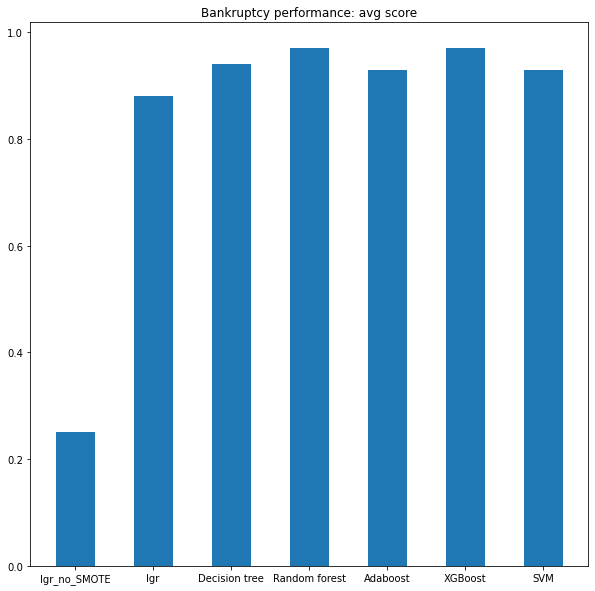

In [13]:
ratings = {'lgr_no_SMOTE': 0.25,'lgr': 0.88, 'Decision tree': 0.94, 'Random forest': 0.97, 'Adaboost': 0.93, 'XGBoost': 0.97, 'SVM': 0.93}
plt.figure(figsize=(10,10))
plt.title('Bankruptcy performance: avg score')
plt.bar(x=ratings.keys(), height=ratings.values(), width = 0.5)
plt.show()

Accuracy score for LogisticRegression(max_iter=100000000, n_jobs=-2): 0.3797673789559102.
Accuracy score for DecisionTreeClassifier(): 0.3521098187719773.
Accuracy score for RandomForestClassifier(): 0.4297403299972951.
Accuracy score for AdaBoostClassifier(): 0.39672369488774684.
Accuracy score for KNeighborsClassifier(): 0.34960779010008114.

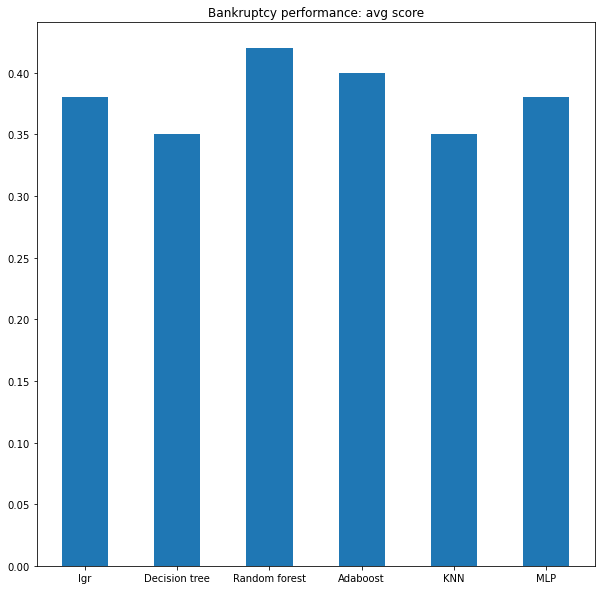

In [14]:
ratings = {'lgr': 0.38, 'Decision tree': 0.35, 'Random forest': 0.42, 'Adaboost': 0.40, 'KNN': 0.35, 'MLP': 0.38}
plt.figure(figsize=(10,10))
plt.title('Bankruptcy performance: avg score')
plt.bar(x=ratings.keys(), height=ratings.values(), width = 0.5)
plt.show()

In [10]:
with open('C:/Users/tommy/Downloads/Telegram Desktop/ChatExport_2021-07-28/result.json', 'rb') as f:
    temp = json.load(f)
    f.close()
temp2 = temp['messages'][0]

In [12]:
for i in temp2:
    if 'theo' in i['text']:
        print(i)

TypeError: string indices must be integers